# Analyze dynophores

Explore how to analyze dynophores in a Jupyter notebook!

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

from dynophores import Dynophore
from dynophores import plots

In [3]:
DATA = Path("../dynophores/tests/data/1KE7-1/DynophoreApp/data")

In [4]:
dynophore_files = [file for file in DATA.glob("*")]
len(dynophore_files)
# NBVAL_CHECK_OUTPUT

38

In [5]:
dynophore_files[0]

PosixPath('../dynophores/tests/data/1KE7-1/DynophoreApp/data/1KE7-1_data_superfeature_H[4599,4602,4601,4608,4609,4600]_100.0.txt')

## Create `Dynophore` instance

In [6]:
dynophore = Dynophore()
# Check how file name is read in
dynophore._file_components(dynophore_files[0])

{'filepath': PosixPath('../dynophores/tests/data/1KE7-1/DynophoreApp/data/1KE7-1_data_superfeature_H[4599,4602,4601,4608,4609,4600]_100.0.txt'),
 'dynophore_id': '1KE7-1',
 'superfeature_id': 'H[4599,4602,4601,4608,4609,4600]',
 'superfeature_feature_type': 'H',
 'superfeature_atom_numbers': [4599, 4602, 4601, 4608, 4609, 4600],
 'envpartner_id': None,
 'envpartner_residue_name': None,
 'envpartner_residue_number': None,
 'envpartner_chain': None,
 'envpartner_atom_numbers': None}

## Load dynophore data

In [7]:
dynophore = Dynophore.from_files(DATA)

In [8]:
dynophore.__dict__

{'id': '1KE7-1',
 'superfeatures': [<dynophores.core.superfeature.SuperFeature at 0x7f8ff3fcd910>,
  <dynophores.core.superfeature.SuperFeature at 0x7f8ff3fcd490>]}

In [9]:
dynophore.superfeatures[0].__dict__

{'id': 'AR[4605,4607,4603,4606,4604]',
 'feature_type': 'AR',
 'atom_numbers': [4605, 4607, 4603, 4606, 4604],
 'occurrences': array([0, 0, 0, ..., 0, 0, 0]),
 'envpartners': [<dynophores.core.envpartner.EnvPartner at 0x7f8ff3fcd190>]}

In [10]:
dynophore.superfeatures[0].envpartners[0].__dict__

{'id': 'LYS-129-A[2026]',
 'residue_name': 'LYS',
 'residue_number': 129,
 'chain': 'A',
 'atom_numbers': [2026],
 'occurrences': array([0, 0, 0, ..., 0, 0, 0]),
 'distances': array([5.9698644, 5.9698644, 8.888019 , ..., 5.7611094, 5.3983994,
        5.4370027])}

In [11]:
print(f"Number of superfeatures: {len(dynophore.superfeatures)}")
# NBVAL_CHECK_OUTPUT

Number of superfeatures: 10


In [12]:
n_envpartners = sum([len(superfeature.envpartners) for superfeature in dynophore.superfeatures])
print(f"Number of environmental partners: {n_envpartners}")
# NBVAL_CHECK_OUTPUT

Number of environmental partners: 28


## Explore superfeatures

#### `dynophore.superfeatures_occurrences`

In [13]:
dynophore.superfeatures_occurrences.head()
# NBVAL_CHECK_OUTPUT

,"AR[4605,4607,4603,4606,4604]","AR[4622,4615,4623,4613,4614,4621]",HBA[4596],HBA[4606],HBA[4618],HBA[4619],HBD[4598],HBD[4612],"H[4599,4602,4601,4608,4609,4600]","H[4615,4623,4622,4613,4621,4614]"
0,0,0,1,0,0,1,0,0,1,1
1,0,0,1,0,0,1,0,0,1,1
2,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,1,1,1


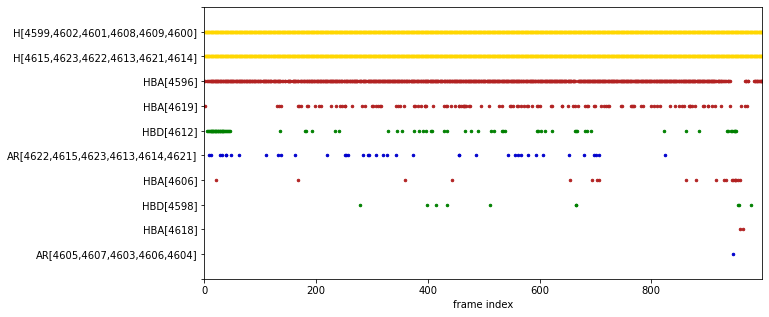

In [14]:
plots.plot_superfeatures_occurrences(dynophore)

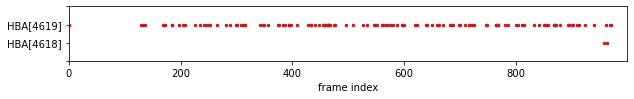

In [15]:
plots.plot_superfeatures_occurrences(dynophore, superfeature_names=["HBA[4619]", "HBA[4618]"])

Superfeature names ['Nonesense'] omitted because unknown.


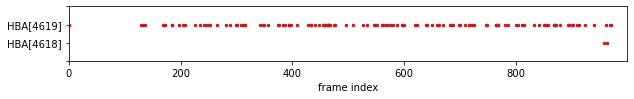

In [16]:
plots.plot_superfeatures_occurrences(
    dynophore, superfeature_names=["HBA[4619]", "HBA[4618]", "Nonesense"]
)

## Explore interactions

#### `dynophore.envpartners_occurrences`

In [17]:
print(dynophore.envpartners_occurrences.keys())
dynophore.envpartners_occurrences["HBA[4619]"].head()

dict_keys(['AR[4605,4607,4603,4606,4604]', 'AR[4622,4615,4623,4613,4614,4621]', 'HBA[4596]', 'HBA[4606]', 'HBA[4618]', 'HBA[4619]', 'HBD[4598]', 'HBD[4612]', 'H[4599,4602,4601,4608,4609,4600]', 'H[4615,4623,4622,4613,4621,4614]'])


,ILE-10-A[165],LYS-20-A[308],LYS-20-A[316],ASP-86-A[1313]
0,0,0,0,1
1,0,0,0,1
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


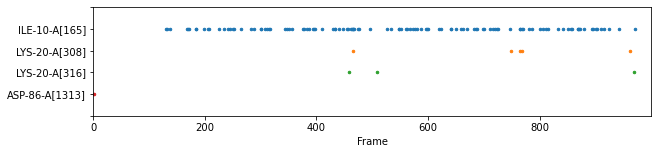

In [18]:
plots.plot_envpartners_occurrences(dynophore, "HBA[4619]")

#### `dynophore.envpartners_distances`

In [19]:
print(dynophore.envpartners_distances.keys())
dynophore.envpartners_distances["HBA[4619]"].head()

dict_keys(['AR[4605,4607,4603,4606,4604]', 'AR[4622,4615,4623,4613,4614,4621]', 'HBA[4596]', 'HBA[4606]', 'HBA[4618]', 'HBA[4619]', 'HBD[4598]', 'HBD[4612]', 'H[4599,4602,4601,4608,4609,4600]', 'H[4615,4623,4622,4613,4621,4614]'])


,ILE-10-A[165],LYS-20-A[308],LYS-20-A[316],ASP-86-A[1313]
0,10.234147,12.086337,10.283849,2.995031
1,10.234147,12.086337,10.283849,2.995031
2,8.992463,10.457222,9.915476,5.948585
3,9.028577,10.351493,8.698255,6.975447
4,9.939754,10.532646,10.217158,5.173286


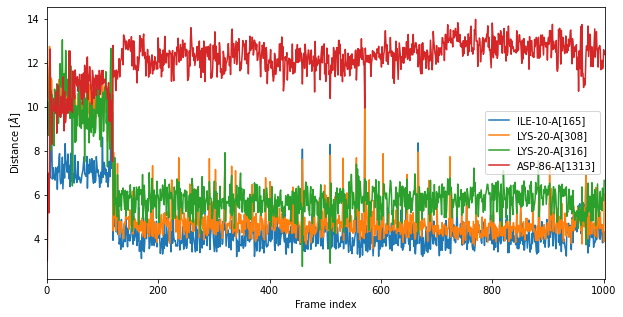

In [20]:
plots.plot_envpartner_distances(dynophore, "HBA[4619]", kind="line")

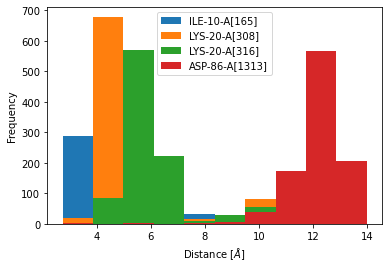

In [21]:
plots.plot_envpartner_distances(dynophore, "HBA[4619]", kind="hist")

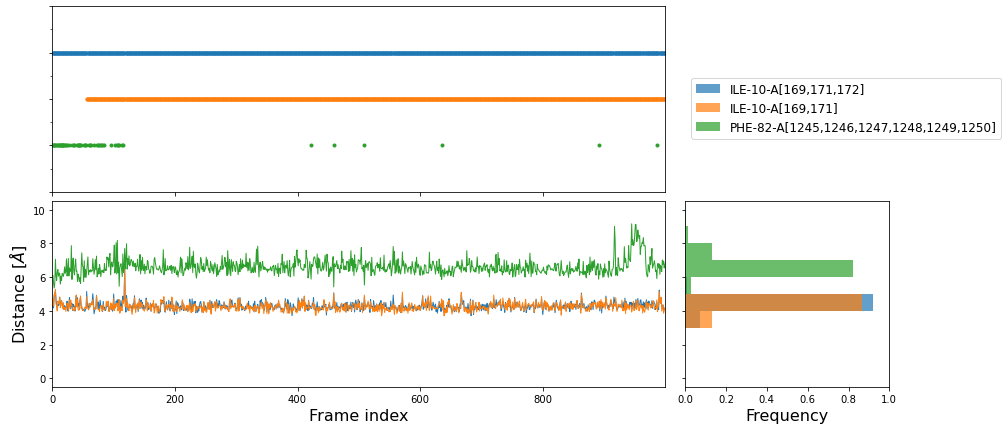

In [22]:
superfeature_name = "H[4615,4623,4622,4613,4621,4614]"
plots.plot_envpartners(dynophore, superfeature_name)

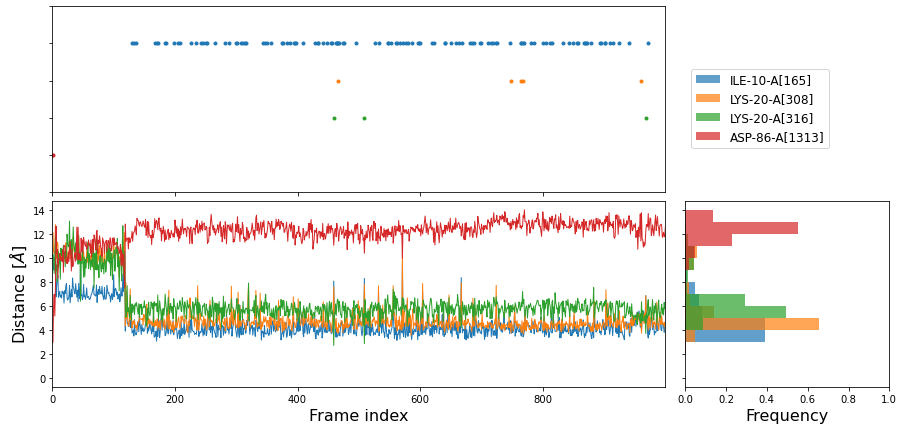

In [23]:
superfeature_name = "HBA[4619]"
plots.plot_envpartners(dynophore, superfeature_name)

#### `n_frames`, `count`, and `frequency`

##### Dynophore

In [24]:
dynophore.n_frames

1002

In [25]:
dynophore.count

,"AR[4605,4607,4603,4606,4604]","AR[4622,4615,4623,4613,4614,4621]",HBA[4596],HBA[4606],HBA[4618],HBA[4619],HBD[4598],HBD[4612],"H[4599,4602,4601,4608,4609,4600]","H[4615,4623,4622,4613,4621,4614]"
"ALA-144-A[2263,2266]",0,0,0,0,0,0,0,0,992,0
"ALA-31-A[488,491]",0,0,0,0,0,0,0,0,216,0
ASP-86-A[1313],0,0,0,0,0,2,0,0,0,0
ASP-86-A[1319],0,0,0,0,0,0,0,18,0,0
ASP-86-A[1320],0,0,0,0,0,0,0,20,0,0
GLN-131-A[2057],0,0,0,0,0,0,0,1,0,0
GLN-131-A[2061],0,0,0,0,0,0,0,8,0,0
GLN-131-A[2062],0,0,0,2,0,0,0,0,0,0
GLU-81-A[1228],0,0,0,0,0,0,8,0,0,0
"HIS-84-A[1284,1285,1286,1287,1288]",0,1,0,0,0,0,0,0,0,0


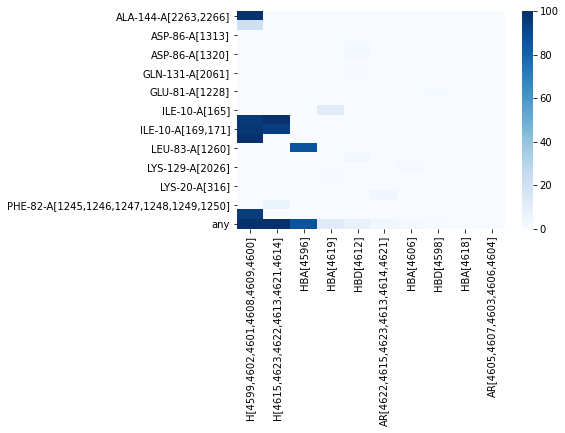

In [26]:
plots.plot_superfeatures_vs_envpartners(dynophore)

##### Superfeatures

In [27]:
dynophore.superfeatures[0].n_frames

1002

In [28]:
dynophore.superfeatures[0].count

any                1
LYS-129-A[2026]    1
dtype: int64

In [29]:
dynophore.superfeatures[0].frequency

any                0.1
LYS-129-A[2026]    0.1
dtype: float64

##### Environmental partners

In [30]:
dynophore.superfeatures[0].envpartners[0].n_frames

1002

In [31]:
dynophore.superfeatures[0].envpartners[0].count

1

In [32]:
dynophore.superfeatures[0].envpartners[0].frequency

0.1